In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import regex as re 
import numpy as np
from sklearn.metrics import silhouette_score
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [13]:
df = pd.read_csv('comments.csv', sep=';')

In [16]:
#Preprocessing
def preprocess(text):
    text = text.lower()
    t = re.sub('\W+',r' ',text)
    t = re.sub('\d',r'',t)
    t = re.sub('\s+\S\s+',r'',t)
    stopwords_list = stopwords.words('english') 
    txt = ' '.join([word for word in t.split() if word not in stopwords_list])
    return txt

lemmatizer = WordNetLemmatizer()


df['pre_com'] = [' '.join([lemmatizer.lemmatize(preprocess(document))])
                 .strip() for document in df['comment']]

In [17]:
#Transforming the abstracts into vectors using TF-IDF scheme. 
#Each vector ends up having 9083 dimensions.
tfidf = TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=5,
                        stop_words='english',norm='l2',binary=False)

X = tfidf.fit_transform(df['pre_com'])
X.shape

(1448, 1526)

c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


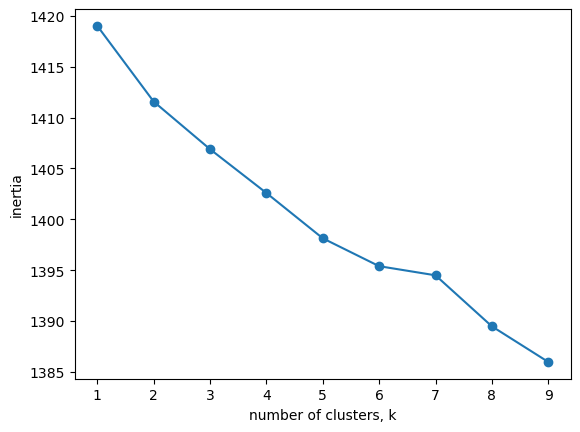

In [18]:
ks = range(1, 10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit(X)
    
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\clust

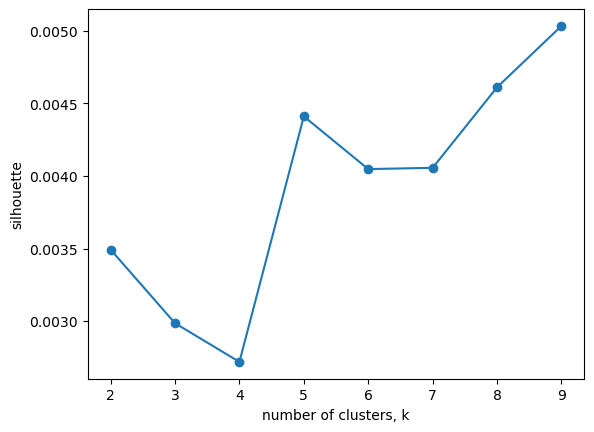

In [19]:
ks = range(2, 10)
sil = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    
    sil.append(sil_score)
    
plt.plot(ks, sil, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks)
plt.show()


In [20]:
km = KMeans(n_clusters=5)

km.fit(X)

c:\Users\gsevr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]), array([507, 195, 321, 357,  68], dtype=int64))

In [23]:
y_pred = km.predict(X)

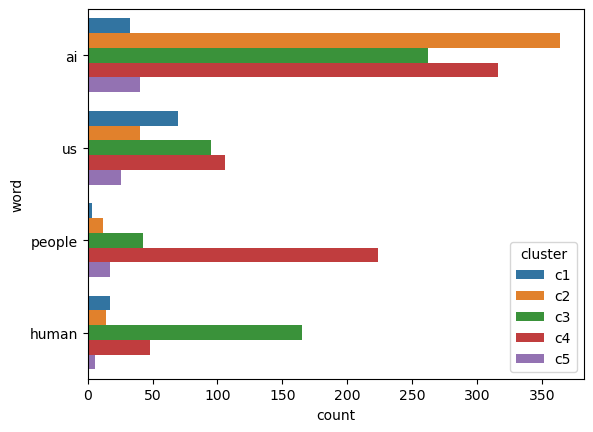

In [52]:
text = ' '.join(df['pre_com'].values)
words = word_tokenize(text.lower())
word_counts = Counter(words)
top_words = word_counts.most_common(100)

df['pred'] = y_pred

cluster_one = ' '.join(df[df['pred'] == 0].pre_com.values).split()
cluster_two = ' '.join(df[df['pred'] == 1].pre_com.values).split()
cluster_three = ' '.join(df[df['pred'] == 2].pre_com.values).split()
cluster_four = ' '.join(df[df['pred'] == 3].pre_com.values).split()
cluster_five = ' '.join(df[df['pred'] == 4].pre_com.values).split()


count_one = Counter(cluster_one)
count_two = Counter(cluster_two)
count_three = Counter(cluster_three)
count_four = Counter(cluster_four)
count_five = Counter(cluster_five)





word_list = []
c1_list = []
c2_list = []
c3_list = []
c4_list = []
c5_list = []

for word, count in top_words:
    word_list.append(word)
    c1_list.append(count_one[word])
    c2_list.append(count_two[word])
    c3_list.append(count_three[word])
    c4_list.append(count_four[word])
    c5_list.append(count_five[word])



c = pd.DataFrame(columns=['c1','c2','c3','c4','c5'], index=word_list)
c['c1'] = c1_list
c['c2'] = c2_list
c['c3'] = c3_list
c['c4'] = c4_list
c['c5'] = c5_list

cx = c.stack().reset_index()
cx.columns = ['word','cluster','count']
sns.barplot(cx.head(20),x='count',y='word',hue='cluster')
plt.show()

In [78]:

grouped = cx.groupby('cluster')

top_words_df = pd.DataFrame(columns=['cluster', 'word', 'count'])

for cluster, group in grouped:
    sorted_group = group.sort_values(by='count', ascending=False)
    
    top_5_words = sorted_group.head(5)
    
    top_words_df = top_words_df.append(top_5_words)

top_words_df.reset_index(inplace=True,drop=True)
top_words_df

C:\Users\gsevr\AppData\Local\Temp\ipykernel_14672\3144885865.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append(top_5_words)
C:\Users\gsevr\AppData\Local\Temp\ipykernel_14672\3144885865.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append(top_5_words)
C:\Users\gsevr\AppData\Local\Temp\ipykernel_14672\3144885865.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append(top_5_words)
C:\Users\gsevr\AppData\Local\Temp\ipykernel_14672\3144885865.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append(top_5_wor

,cluster,word,count
0,c1,us,70
1,c1,one,50
2,c1,would,42
3,c1,humans,38
4,c1,could,36
5,c2,ai,364
6,c2,us,40
7,c2,could,35
8,c2,would,30
9,c2,humans,21


<Axes: xlabel='word', ylabel='count'>

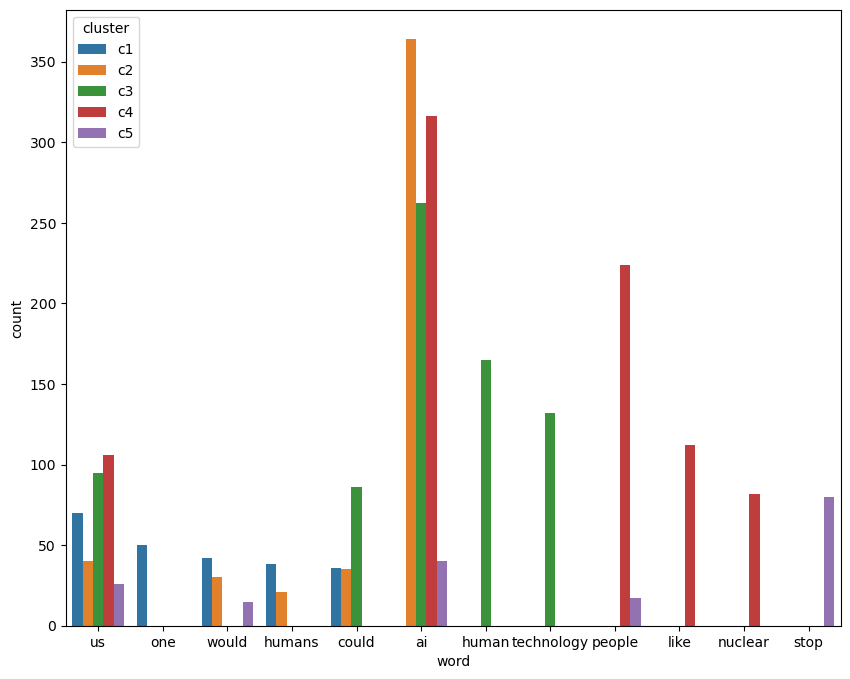

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(top_words_df,x='word',y='count',hue='cluster')